In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [27]:
football_data = pd.read_csv('https://raw.githubusercontent.com/AlejandroGuedez/Equipo-23-de-Diplomado-data-scientist/Versiones/players_22.csv', low_memory=False)

In [4]:
football_data.head()

,sofifa_id,player_url,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,...,lcb,cb,rcb,rb,gk,player_face_url,club_logo_url,club_flag_url,nation_logo_url,nation_flag_url
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,"RW, ST, CF",93,93,78000000.0,320000.0,34,...,50+3,50+3,50+3,61+3,19+3,https://cdn.sofifa.net/players/158/023/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,https://cdn.sofifa.net/teams/1369/60.png,https://cdn.sofifa.net/flags/ar.png
1,188545,https://sofifa.com/player/188545/robert-lewand...,R. Lewandowski,Robert Lewandowski,ST,92,92,119500000.0,270000.0,32,...,60+3,60+3,60+3,61+3,19+3,https://cdn.sofifa.net/players/188/545/22_120.png,https://cdn.sofifa.net/teams/21/60.png,https://cdn.sofifa.net/flags/de.png,https://cdn.sofifa.net/teams/1353/60.png,https://cdn.sofifa.net/flags/pl.png
2,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,"ST, LW",91,91,45000000.0,270000.0,36,...,53+3,53+3,53+3,60+3,20+3,https://cdn.sofifa.net/players/020/801/22_120.png,https://cdn.sofifa.net/teams/11/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1354/60.png,https://cdn.sofifa.net/flags/pt.png
3,190871,https://sofifa.com/player/190871/neymar-da-sil...,Neymar Jr,Neymar da Silva Santos Júnior,"LW, CAM",91,91,129000000.0,270000.0,29,...,50+3,50+3,50+3,62+3,20+3,https://cdn.sofifa.net/players/190/871/22_120.png,https://cdn.sofifa.net/teams/73/60.png,https://cdn.sofifa.net/flags/fr.png,NaN,https://cdn.sofifa.net/flags/br.png
4,192985,https://sofifa.com/player/192985/kevin-de-bruy...,K. De Bruyne,Kevin De Bruyne,"CM, CAM",91,91,125500000.0,350000.0,30,...,69+3,69+3,69+3,75+3,21+3,https://cdn.sofifa.net/players/192/985/22_120.png,https://cdn.sofifa.net/teams/10/60.png,https://cdn.sofifa.net/flags/gb-eng.png,https://cdn.sofifa.net/teams/1325/60.png,https://cdn.sofifa.net/flags/be.png


In [12]:
variables = football_data.columns.values.tolist()
for v in variables:
    print(v)
print(len(football_data.columns), 'variables')
print(len(football_data))

sofifa_id
player_url
short_name
long_name
player_positions
overall
potential
value_eur
wage_eur
age
dob
height_cm
weight_kg
club_team_id
club_name
league_name
league_level
club_position
club_jersey_number
club_loaned_from
club_joined
club_contract_valid_until
nationality_id
nationality_name
nation_team_id
nation_position
nation_jersey_number
preferred_foot
weak_foot
skill_moves
international_reputation
work_rate
body_type
real_face
release_clause_eur
player_tags
player_traits
pace
shooting
passing
dribbling
defending
physic
attacking_crossing
attacking_finishing
attacking_heading_accuracy
attacking_short_passing
attacking_volleys
skill_dribbling
skill_curve
skill_fk_accuracy
skill_long_passing
skill_ball_control
movement_acceleration
movement_sprint_speed
movement_agility
movement_reactions
movement_balance
power_shot_power
power_jumping
power_stamina
power_strength
power_long_shots
mentality_aggression
mentality_interceptions
mentality_positioning
mentality_vision
mentality_penalties


In [10]:
football_data.describe() #60 variables numericas

,sofifa_id,overall,potential,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,league_level,...,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
count,19239.000000,19239.000000,19239.000000,1.916500e+04,19178.000000,19239.000000,19239.000000,19239.000000,19178.000000,19178.000000,...,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,19239.000000,2132.000000
mean,231468.086959,65.772182,71.079370,2.850452e+06,9017.989363,25.210822,181.299704,74.943032,50580.498123,1.354364,...,57.929830,46.601746,48.045584,45.906700,16.406102,16.192474,16.055356,16.229274,16.491814,36.439962
std,27039.717497,6.880232,6.086213,7.613700e+06,19470.176724,4.748235,6.863179,7.069434,54401.868535,0.747865,...,12.159326,20.200807,21.232718,20.755683,17.574028,16.839528,16.564554,17.059779,17.884833,10.751563
min,41.000000,47.000000,49.000000,9.000000e+03,500.000000,16.000000,155.000000,49.000000,1.000000,1.000000,...,12.000000,4.000000,5.000000,5.000000,2.000000,2.000000,2.000000,2.000000,2.000000,15.000000
25%,214413.500000,61.000000,67.000000,4.750000e+05,1000.000000,21.000000,176.000000,70.000000,479.000000,1.000000,...,50.000000,29.000000,28.000000,25.000000,8.000000,8.000000,8.000000,8.000000,8.000000,27.000000
50%,236543.000000,66.000000,71.000000,9.750000e+05,3000.000000,25.000000,181.000000,75.000000,1938.000000,1.000000,...,59.000000,52.000000,56.000000,53.000000,11.000000,11.000000,11.000000,11.000000,11.000000,36.000000
75%,253532.500000,70.000000,75.000000,2.000000e+06,8000.000000,29.000000,186.000000,80.000000,111139.000000,1.000000,...,66.000000,63.000000,65.000000,63.000000,14.000000,14.000000,14.000000,14.000000,14.000000,45.000000
max,264640.000000,93.000000,95.000000,1.940000e+08,350000.000000,54.000000,206.000000,110.000000,115820.000000,5.000000,...,96.000000,93.000000,93.000000,92.000000,91.000000,92.000000,93.000000,92.000000,90.000000,65.000000


#### Visualizacion de datos faltantes

nation_jersey_number         18480
nation_team_id               18480
nation_position              18480
nation_logo_url              18480
club_loaned_from             18137
player_tags                  17798
goalkeeping_speed            17107
player_traits                 9841
physic                        2132
defending                     2132
dribbling                     2132
passing                       2132
shooting                      2132
pace                          2132
release_clause_eur            1176
club_joined                   1163
value_eur                       74
league_level                    61
wage_eur                        61
club_team_id                    61
club_name                       61
club_contract_valid_until       61
club_jersey_number              61
club_position                   61
club_logo_url                   61
club_flag_url                   61
league_name                     61


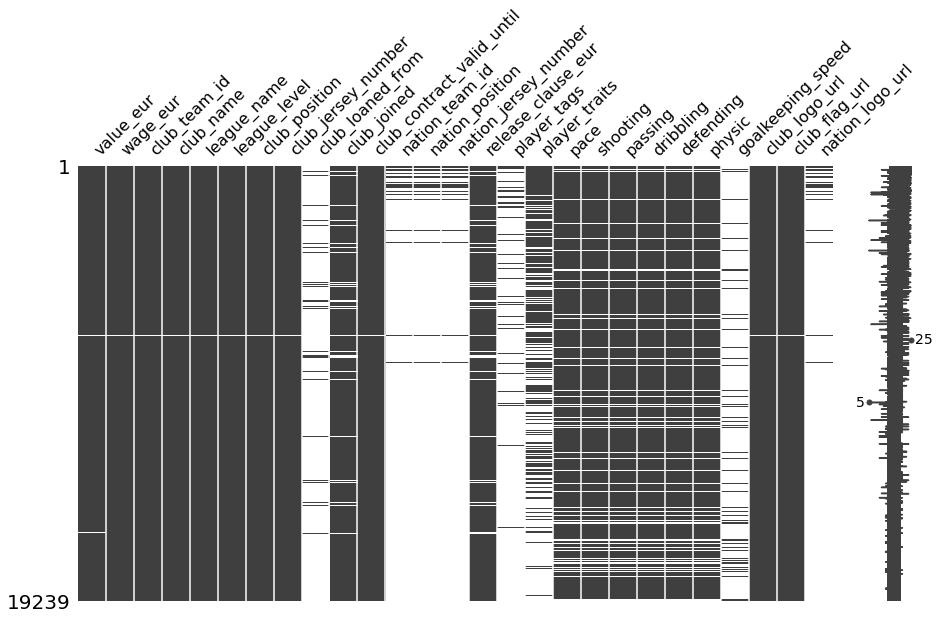

In [23]:
null_values_series = football_data.isnull().sum().where(lambda x : x > 0).dropna().astype('Int32')
print(null_values_series.sort_values(ascending=False).to_string()) # to_string() removes the name and dtype from the output
msno.matrix(football_data[null_values_series.index.tolist()], figsize=(15, 8));

In [28]:
#Eliminaremos las variables con mas de 9000 datos faltantes, ya que es mas de la mitad de los datos e imputar las mismas
#no tiene sentido

football_data = football_data.drop(['nation_jersey_number', 'nation_team_id','nation_position', 'nation_logo_url', 'club_loaned_from', 'player_tags','goalkeeping_speed','player_traits'], axis=1)

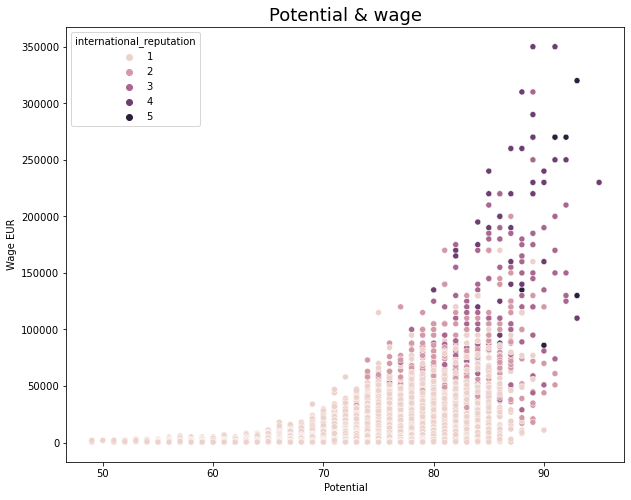

In [31]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x =football_data['potential'], y = football_data['wage_eur'], hue = football_data['international_reputation'])
plt.xlabel("Potential") 
plt.ylabel("Wage EUR")
plt.title("Potential & wage", fontsize = 18)
plt.show()

Como es de esperarse, hay una gran correlacion entre el potencial y el salario cobrado en euros, a medida que la reputacion internacional aumenta, mas salario cobra tambien.

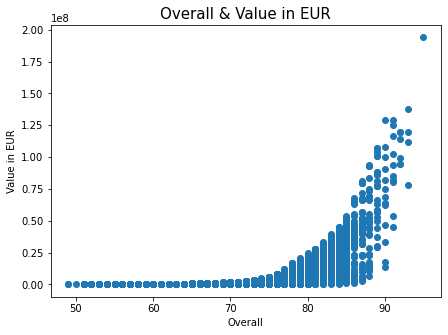

In [35]:
#Veremos la correlacion entre la valoracion general y el salario. 
fig, ax = plt.subplots(figsize=(7,5))
plt.scatter(x=football_data['potential'], y=football_data['value_eur'] )
plt.xlabel("Overall") 
plt.ylabel("Value in EUR")
plt.title("Overall & Value in EUR", fontsize = 15)
plt.show()


Como tambien era de esperarse, se observa una marcada correlacion entre la valoracion general y el salario

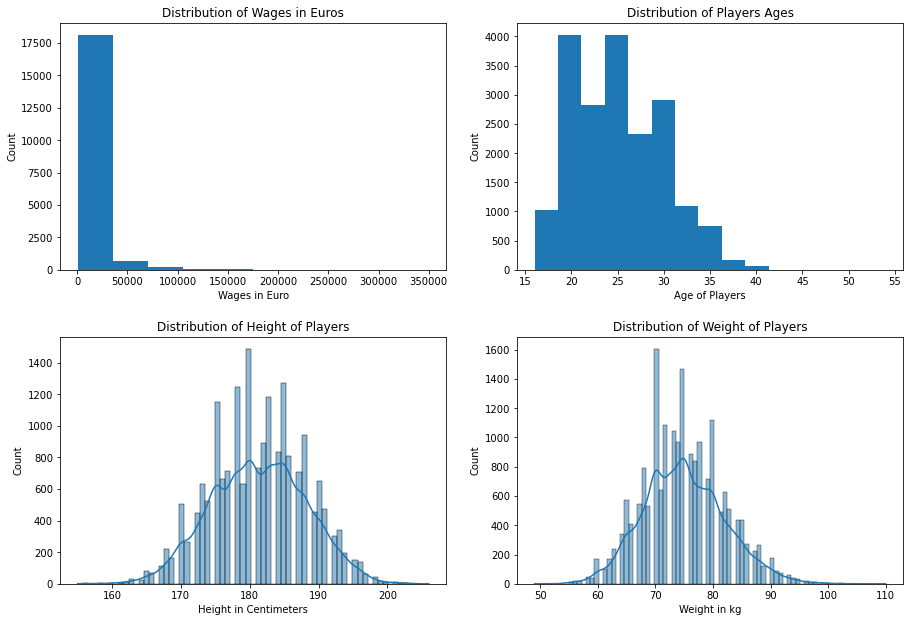

In [36]:
# Observaremos la distribucion de algunas variables:

fig, axes = plt.subplots(2, 2, figsize=(13, 9))
axes[0,0].hist(football_data['wage_eur'])
axes[0,0].set_xlabel('Wages in Euro')
axes[0,0].set_ylabel('Count')
axes[0,0].set_title('Distribution of Wages in Euros')

axes[0,1].hist(football_data['age'], bins = 15)
axes[0,1].set_xlabel('Age of Players')
axes[0,1].set_ylabel('Count')
axes[0,1].set_title('Distribution of Players Ages')

# first two is using a matplotlib syntax, the next two I'll do with seaborn 

axes[1,0].set_title('Distribution of Height of Players')
sns.histplot(football_data, x='height_cm', ax=axes[1,0], kde=True)
axes[1,0].set_xlabel('Height in Centimeters')
axes[1,0].set_ylabel('Count')


axes[1,1].set_title('Distribution of Weight of Players')
sns.histplot(football_data, x='weight_kg', ax=axes[1,1], kde=True)
axes[1,1].set_xlabel('Weight in kg')
axes[1,1].set_ylabel('Count')


plt.tight_layout(pad=2)
plt.show()

In [57]:
stats_rank = football_data.groupby(['nationality_name']).mean()
print(stats_rank['overall'].sort_values(ascending=False))

nationality_name
Tanzania                    74.000000
Libya                       73.333333
Mozambique                  73.000000
Central African Republic    72.500000
Egypt                       72.250000
                              ...    
Guyana                      57.714286
India                       53.717489
Hong Kong                   53.000000
South Sudan                 52.800000
Indonesia                   51.000000
Name: overall, Length: 163, dtype: float64


In [63]:
from collections import Counter
bar_plot = dict(Counter(football_data['nationality_name'].values).most_common(10))
bar_plot

{'England': 1719,
 'Germany': 1214,
 'Spain': 1086,
 'France': 980,
 'Argentina': 960,
 'Brazil': 897,
 'Japan': 546,
 'Netherlands': 439,
 'United States': 413,
 'Poland': 403}

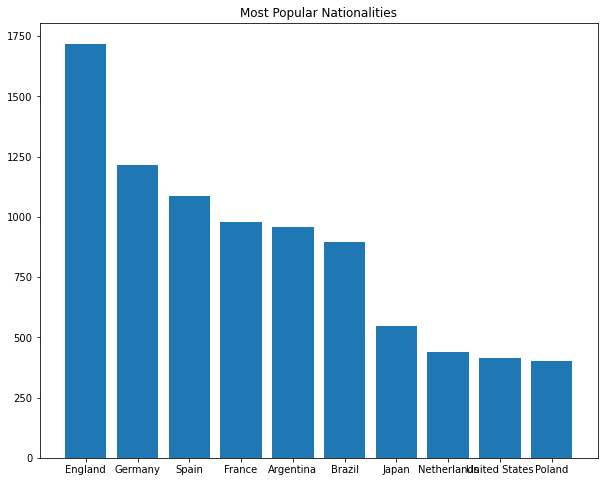

In [65]:
fig, ax = plt.subplots(figsize = (10,8))
plt.bar(*zip(*bar_plot.items()))
ax.set_title('Most Popular Nationalities')
plt.show()